## 1. Imports & Settings

Import all necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully")

✅ All libraries imported successfully


## 2. Load Datasets

Load the three main datasets:
- **ERP**: Employee data with hourly costs
- **MES**: Manufacturing execution system data with operations
- **PLM**: Product lifecycle management data with component costs

In [2]:
# Load ERP dataset (Employee data)
erp = pd.read_excel('data/ERP_Equipes Airplus.xlsx')
print(f"📊 ERP loaded: {erp.shape[0]} employees, {erp.shape[1]} columns")
print(f"Columns: {list(erp.columns)}\n")

# Load MES dataset (Manufacturing operations)
mes = pd.read_excel('data/MES_Extraction.xlsx')
print(f"📊 MES loaded: {mes.shape[0]} operations, {mes.shape[1]} columns")
print(f"Columns: {list(mes.columns)}\n")

# Load PLM dataset (Component data)
plm = pd.read_excel('data/PLM_DataSet.xlsx')
print(f"📊 PLM loaded: {plm.shape[0]} components, {plm.shape[1]} columns")
print(f"Columns: {list(plm.columns)}\n")

print("✅ All datasets loaded successfully")

📊 ERP loaded: 150 employees, 13 columns
Columns: ['Matricule', 'Prénom', 'Nom', 'Âge', 'Qualification', 'Poste de montage', 'Description du poste', 'Compétences', 'Habilitations', 'Coût horaire (€)', "Niveau d'expérience", 'Rotation', 'Commentaire de Carrière']

📊 MES loaded: 56 operations, 11 columns
Columns: ['Poste', 'Nom', 'Nombre pièces', 'Référence', 'Temps Prévu', 'Date', 'Heure Début', 'Heure Fin', 'Temps Réel', 'Aléas Industriels', 'Cause Potentielle']

📊 PLM loaded: 40 components, 9 columns
Columns: ['Code / Référence', 'Désignation', 'Quantité', 'Fournisseur', 'Délai Approvisionnement', 'Criticité', 'Masse (kg)', 'Coût achat pièce (€)', 'Temps CAO (h)']

✅ All datasets loaded successfully


### 2.1 Preview ERP Data

In [3]:
print("=== ERP Dataset Preview ===")
display(erp.head())
print(f"\n📌 Key columns for linking: 'Poste de montage' (format: 'Poste X')")
print(f"📌 Cost column: 'Coût horaire (€)'")

=== ERP Dataset Preview ===


,Matricule,Prénom,Nom,Âge,Qualification,Poste de montage,Description du poste,Compétences,Habilitations,Coût horaire (€),Niveau d'expérience,Rotation,Commentaire de Carrière
0,AIR0001,Jacques,Petit,49,Expert Technique,Poste 1,"Travail sur Poste 1, assemblage et contrôle","Assemblage Niveau 3, Montage mécanique Niveau ...",Pneumatique Certifié,42.50,Expert,Semaine 1: Poste 55 | Semaine 3: Poste 50,Technicien aéronautique ayant débuté comme opé...
1,AIR0002,François,Lefebvre,24,Technicien Junior,Poste 2,"Travail sur Poste 2, assemblage et contrôle","Contrôle qualité Niveau 1, Lecture plan Niveau...","Électrique, Pneumatique",32.50,Débutant,Semaine 1: Poste 7 | Semaine 2: Poste 11,"Jeune diplômé fraîchement arrivé, en phase d'a..."
2,AIR0003,Nathalie,Garcia,39,Technicien Confirmé,Poste 3,"Travail sur Poste 3, assemblage et contrôle","Lecture plan Niveau 2, Soudure Niveau 2, Contr...","Électrique, Hydraulique",35.75,Confirmé,Semaine 1: Poste 14 | Semaine 2: Poste 56,Professionnelle rigoureuse ayant développé une...
3,AIR0004,Martine,Durand,37,Opérateur Qualifié,Poste 4,"Travail sur Poste 4, assemblage et contrôle","Montage électrique Niveau 2, Assemblage Niveau...",Pneumatique,33.50,Confirmé,Semaine 1: Poste 32 | Semaine 2: Poste 5,"Opératrice polyvalente, spécialisée dans la co..."
4,AIR0005,Luc,David,37,Chef d'Équipe Technique,Poste 5,"Travail sur Poste 5, assemblage et contrôle","Lecture plan Niveau 2, Soudure Niveau 2","Électrique, Hydraulique",36.75,Confirmé,Semaine 1: Poste 26 | Semaine 2: Poste 35,"Technicien méthodique passé chef d'équipe, rec..."



📌 Key columns for linking: 'Poste de montage' (format: 'Poste X')
📌 Cost column: 'Coût horaire (€)'


### 2.2 Preview MES Data

In [4]:
print("=== MES Dataset Preview ===")
display(mes.head())
print(f"\n📌 Key columns: 'Poste' (integer), 'Référence' (semicolon-separated)")
print(f"📌 Time columns: 'Temps Prévu', 'Temps Réel' (datetime.time objects)")

=== MES Dataset Preview ===


,Poste,Nom,Nombre pièces,Référence,Temps Prévu,Date,Heure Début,Heure Fin,Temps Réel,Aléas Industriels,Cause Potentielle
0,1,Montage train atterissage,8,A018;C769;A259;A259;A259;A259;A623;A623,00:25:00,2023-09-01,08:00:00,08:32:45,00:32:45,Rupture outillage spécifique,"Usure prématurée, maintenance différée"
1,2,Assemblage moteur / fuselage / train atterissage,11,D088;D088;D234;A511;A511;A511;A337;A337;D277;A...,00:45:00,2023-09-01,08:32:45,09:30:15,00:57:30,Dysfonctionnement machine soudure,"Défaut électronique, usure composants"
2,3,Assemblage moteur / fuselage / train atterissage,6,A511;A511;A337;A337;A806;A416,00:30:00,2023-09-01,09:30:15,10:11:30,00:41:15,Problème température atelier,"Climatisation défectueuse, isolation insuffisante"
3,4,Assemblage visserie fuselage partie basse,4,A511;A511;A337;A337,00:15:00,2023-09-01,10:11:30,10:32:15,00:20:45,Défaillance contrôle qualité,"Capteurs obsolètes, étalonnage incorrect"
4,5,Assemblage visserie train atterissage,2,A511;A337,00:10:00,2023-09-01,10:32:15,10:46:45,00:14:30,Usure équipements serrage,"Cycles intensifs, maintenance préventive insuf..."



📌 Key columns: 'Poste' (integer), 'Référence' (semicolon-separated)
📌 Time columns: 'Temps Prévu', 'Temps Réel' (datetime.time objects)


### 2.3 Preview PLM Data

In [5]:
print("=== PLM Dataset Preview ===")
display(plm.head())
print(f"\n📌 Key column for linking: 'Code / Référence'")
print(f"📌 Cost column: 'Coût achat pièce (€)'")

=== PLM Dataset Preview ===


,Code / Référence,Désignation,Quantité,Fournisseur,Délai Approvisionnement,Criticité,Masse (kg),Coût achat pièce (€),Temps CAO (h)
0,D119,Nez_Gauche,1,AeroStructure France,15-20 jours,Critique,45.50,85000,156
1,D120,Nez_Droit,1,AeroStructure France,15-20 jours,Critique,45.50,85000,156
2,D145,Queue_Arrière_Gauche,1,Airbus Composites,10-15 jours,Haute,35.20,65000,98
3,D144,Queue_Arrière_Droite,1,Airbus Composites,10-15 jours,Haute,35.20,65000,98
4,D142,Moteur,4,Safran Engines,30-45 jours,Critique,1250.00,2500000,512



📌 Key column for linking: 'Code / Référence'
📌 Cost column: 'Coût achat pièce (€)'


## 3. Clean & Convert MES Time Fields

Convert `datetime.time` objects to `timedelta` for proper arithmetic operations.

In [6]:
def time_to_timedelta(t):
    """
    Convert datetime.time object to pandas.Timedelta.
    Handles None/NaN values gracefully.
    """
    if pd.isna(t):
        return pd.Timedelta(0)
    if isinstance(t, time):
        return pd.Timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
    return pd.Timedelta(0)

# Convert time columns to timedelta
mes['Temps Prévu (td)'] = mes['Temps Prévu'].apply(time_to_timedelta)
mes['Temps Réel (td)'] = mes['Temps Réel'].apply(time_to_timedelta)

# Convert to hours for easier interpretation
mes['Temps Prévu (h)'] = mes['Temps Prévu (td)'].dt.total_seconds() / 3600
mes['Temps Réel (h)'] = mes['Temps Réel (td)'].dt.total_seconds() / 3600

print("✅ Time fields converted to timedelta and hours")
print(f"\nSample conversions:")
display(mes[['Temps Prévu', 'Temps Prévu (h)', 'Temps Réel', 'Temps Réel (h)']].head())

✅ Time fields converted to timedelta and hours

Sample conversions:


,Temps Prévu,Temps Prévu (h),Temps Réel,Temps Réel (h)
0,00:25:00,0.42,00:32:45,0.55
1,00:45:00,0.75,00:57:30,0.96
2,00:30:00,0.50,00:41:15,0.69
3,00:15:00,0.25,00:20:45,0.35
4,00:10:00,0.17,00:14:30,0.24


## 4. Compute Delays

Calculate delay (retard) as the difference between actual and planned time, keeping only positive delays.

In [7]:
# Calculate delay in hours (only positive delays)
mes['Retard (h)'] = (mes['Temps Réel (h)'] - mes['Temps Prévu (h)']).clip(lower=0)

print(f"✅ Delays computed")
print(f"\n📊 Delay Statistics:")
print(f"   Total operations: {len(mes)}")
print(f"   Operations with delays: {(mes['Retard (h)'] > 0).sum()}")
print(f"   Average delay: {mes['Retard (h)'].mean():.2f} hours")
print(f"   Total delay: {mes['Retard (h)'].sum():.2f} hours")
print(f"   Max delay: {mes['Retard (h)'].max():.2f} hours")

display(mes[['Poste', 'Nom', 'Temps Prévu (h)', 'Temps Réel (h)', 'Retard (h)']].head(10))

✅ Delays computed

📊 Delay Statistics:
   Total operations: 56
   Operations with delays: 56
   Average delay: 0.16 hours
   Total delay: 8.96 hours
   Max delay: 0.63 hours


,Poste,Nom,Temps Prévu (h),Temps Réel (h),Retard (h)
0,1,Montage train atterissage,0.42,0.55,0.13
1,2,Assemblage moteur / fuselage / train atterissage,0.75,0.96,0.21
2,3,Assemblage moteur / fuselage / train atterissage,0.50,0.69,0.19
3,4,Assemblage visserie fuselage partie basse,0.25,0.35,0.10
4,5,Assemblage visserie train atterissage,0.17,0.24,0.08
5,6,Assemblage fuselage centrale,0.33,0.46,0.13
6,7,Assemblage fuselage centrale,0.33,0.44,0.10
7,8,Assemblage fuselage centrale,0.58,0.79,0.21
8,9,Assemblage fuselage centrale,0.67,0.91,0.24
9,10,Assemblage queue avion,0.75,1.04,0.29


## 5. ERP → MES Hourly Cost Mapping

Extract workstation numbers from ERP and compute average hourly cost per workstation.  
Then map these costs to MES operations.

In [8]:
# Extract workstation number from "Poste de montage" (e.g., "Poste 1" -> 1)
erp['Poste_num'] = erp['Poste de montage'].str.extract(r'(\d+)').astype(float)

# Calculate average hourly cost per workstation (in case multiple employees per poste)
cost_per_poste = erp.groupby('Poste_num')['Coût horaire (€)'].mean().reset_index()
cost_per_poste.columns = ['Poste', 'Coût horaire (€)']

print("✅ Hourly costs extracted from ERP")
print(f"\n📊 Average Hourly Cost per Workstation:")
display(cost_per_poste)

# Merge hourly cost into MES dataset
mes = mes.merge(cost_per_poste, on='Poste', how='left')

# Check for any unmapped postes
unmapped = mes['Coût horaire (€)'].isna().sum()
if unmapped > 0:
    print(f"⚠️ Warning: {unmapped} MES operations have no matching hourly cost")
    # Fill with median cost as fallback
    median_cost = cost_per_poste['Coût horaire (€)'].median()
    mes['Coût horaire (€)'].fillna(median_cost, inplace=True)
    print(f"   Filled with median cost: {median_cost:.2f} €/h")
else:
    print("✅ All MES operations successfully mapped to hourly costs")

print(f"\nMES with hourly costs:")
display(mes[['Poste', 'Nom', 'Temps Réel (h)', 'Coût horaire (€)']].head())

✅ Hourly costs extracted from ERP

📊 Average Hourly Cost per Workstation:


,Poste,Coût horaire (€)
0,1.00,36.83
1,2.00,37.83
2,3.00,36.58
3,4.00,34.50
4,5.00,39.92
5,6.00,38.50
6,7.00,35.17
7,8.00,37.75
8,9.00,41.50
9,10.00,40.83


✅ All MES operations successfully mapped to hourly costs

MES with hourly costs:


,Poste,Nom,Temps Réel (h),Coût horaire (€)
0,1,Montage train atterissage,0.55,36.83
1,2,Assemblage moteur / fuselage / train atterissage,0.96,37.83
2,3,Assemblage moteur / fuselage / train atterissage,0.69,36.58
3,4,Assemblage visserie fuselage partie basse,0.35,34.50
4,5,Assemblage visserie train atterissage,0.24,39.92


## 6. MES Reference Expansion

Split the semicolon-separated 'Référence' field to create one row per component.  
This allows us to link each component to PLM data.

In [9]:
# Create a unique operation ID before expansion
mes['Operation_ID'] = range(len(mes))

print(f"📊 Original MES: {len(mes)} operations")

# Split references and explode into separate rows
mes['Référence_list'] = mes['Référence'].str.split(';')
mes_expanded = mes.explode('Référence_list').reset_index(drop=True)

# Clean up reference codes (remove whitespace)
mes_expanded['Référence_clean'] = mes_expanded['Référence_list'].str.strip()

# Remove empty references
mes_expanded = mes_expanded[mes_expanded['Référence_clean'].notna() & (mes_expanded['Référence_clean'] != '')]

print(f"📊 Expanded MES: {len(mes_expanded)} component-operations")
print(f"   Average components per operation: {len(mes_expanded) / len(mes):.2f}")

print(f"\n✅ MES references expanded")
print(f"\nSample of expanded data:")
display(mes_expanded[['Operation_ID', 'Poste', 'Nom', 'Référence_clean', 'Temps Réel (h)']].head(10))

📊 Original MES: 56 operations
📊 Expanded MES: 304 component-operations
   Average components per operation: 5.43

✅ MES references expanded

Sample of expanded data:


,Operation_ID,Poste,Nom,Référence_clean,Temps Réel (h)
0,0,1,Montage train atterissage,A018,0.55
1,0,1,Montage train atterissage,C769,0.55
2,0,1,Montage train atterissage,A259,0.55
3,0,1,Montage train atterissage,A259,0.55
4,0,1,Montage train atterissage,A259,0.55
5,0,1,Montage train atterissage,A259,0.55
6,0,1,Montage train atterissage,A623,0.55
7,0,1,Montage train atterissage,A623,0.55
8,1,2,Assemblage moteur / fuselage / train atterissage,D088,0.96
9,1,2,Assemblage moteur / fuselage / train atterissage,D088,0.96


## 7. MES ↔ PLM Merge

Join the expanded MES data with PLM component data to get costs and criticality for each component.

In [10]:
# Prepare PLM data - ensure column name consistency
if 'Code / Référence' in plm.columns:
    plm_key = 'Code / Référence'
elif 'Référence' in plm.columns:
    plm_key = 'Référence'
elif 'Code' in plm.columns:
    plm_key = 'Code'
else:
    print("⚠️ PLM reference column not found. Available columns:")
    print(plm.columns)
    plm_key = plm.columns[0]  # Use first column as fallback

print(f"Using PLM key column: '{plm_key}'")

# Clean PLM reference codes
plm['Référence_clean'] = plm[plm_key].astype(str).str.strip()

# Merge MES expanded with PLM
mes_with_plm = mes_expanded.merge(
    plm,
    left_on='Référence_clean',
    right_on='Référence_clean',
    how='left'
)

# Check merge success
matched = mes_with_plm['Coût achat pièce (€)'].notna().sum()
total = len(mes_with_plm)
print(f"\n✅ MES-PLM merge completed")
print(f"   Matched: {matched}/{total} ({100*matched/total:.1f}%)")
print(f"   Unmatched: {total - matched} component-operations")

if total - matched > 0:
    print(f"\n⚠️ Sample of unmatched references:")
    unmatched_refs = mes_with_plm[mes_with_plm['Coût achat pièce (€)'].isna()]['Référence_clean'].unique()[:10]
    print(unmatched_refs)

print(f"\nSample of merged data:")
display(mes_with_plm[['Operation_ID', 'Poste', 'Nom', 'Référence_clean', 'Coût achat pièce (€)', 'Criticité']].head(10))

Using PLM key column: 'Code / Référence'

✅ MES-PLM merge completed
   Matched: 304/304 (100.0%)
   Unmatched: 0 component-operations

Sample of merged data:


,Operation_ID,Poste,Nom,Référence_clean,Coût achat pièce (€),Criticité
0,0,1,Montage train atterissage,A018,500,Moyenne
1,0,1,Montage train atterissage,C769,1800,Moyenne
2,0,1,Montage train atterissage,A259,100,Moyenne
3,0,1,Montage train atterissage,A259,100,Moyenne
4,0,1,Montage train atterissage,A259,100,Moyenne
5,0,1,Montage train atterissage,A259,100,Moyenne
6,0,1,Montage train atterissage,A623,75000,Critique
7,0,1,Montage train atterissage,A623,75000,Critique
8,1,2,Assemblage moteur / fuselage / train atterissage,D088,1200000,Critique
9,1,2,Assemblage moteur / fuselage / train atterissage,D088,1200000,Critique


## 8. Material Cost Aggregation

Aggregate component costs back to the original operation level.  
Calculate total material cost and component count per operation.

In [11]:
# Fill NaN costs with 0 for aggregation
mes_with_plm['Coût achat pièce (€)'] = mes_with_plm['Coût achat pièce (€)'].fillna(0)

# Aggregate material costs per operation
material_costs = mes_with_plm.groupby('Operation_ID').agg({
    'Coût achat pièce (€)': 'sum',
    'Référence_clean': 'count'
}).reset_index()

material_costs.columns = ['Operation_ID', 'Coût matière total (€)', 'Nombre de composants']

print(f"✅ Material costs aggregated per operation")
print(f"\n📊 Material Cost Statistics:")
print(f"   Total material cost: {material_costs['Coût matière total (€)'].sum():,.2f} €")
print(f"   Average per operation: {material_costs['Coût matière total (€)'].mean():.2f} €")
print(f"   Max material cost: {material_costs['Coût matière total (€)'].max():,.2f} €")
print(f"   Average components per operation: {material_costs['Nombre de composants'].mean():.2f}")

display(material_costs.head(10))

✅ Material costs aggregated per operation

📊 Material Cost Statistics:
   Total material cost: 21,128,270.00 €
   Average per operation: 384150.36 €
   Max material cost: 10,014,320.00 €
   Average components per operation: 5.53


,Operation_ID,Coût matière total (€),Nombre de composants
0,0,152700,8
1,1,2654650,11
2,2,4660,6
3,3,160,4
4,4,80,2
5,5,1203900,5
6,6,1203900,5
7,7,4720,10
8,8,2404720,12
9,9,84370,11


## 9. Cost Computations

Compute all cost metrics:
- Human cost (labor)
- Delay surcharge
- Total cost (human + material)

In [12]:
# Merge material costs back into original MES
mes_final = mes.merge(material_costs, on='Operation_ID', how='left')

# Fill NaN material costs with 0
mes_final['Coût matière total (€)'] = mes_final['Coût matière total (€)'].fillna(0)
mes_final['Nombre de composants'] = mes_final['Nombre de composants'].fillna(0)

# Calculate human cost
mes_final['Coût humain (€)'] = mes_final['Temps Réel (h)'] * mes_final['Coût horaire (€)']

# Calculate delay surcharge
mes_final['Surcoût retard (€)'] = mes_final['Retard (h)'] * mes_final['Coût horaire (€)']

# Calculate total cost
mes_final['Coût total (€)'] = mes_final['Coût humain (€)'] + mes_final['Coût matière total (€)']

print("✅ All cost metrics computed")
print(f"\n📊 Cost Summary:")
print(f"   Total Human Cost: {mes_final['Coût humain (€)'].sum():,.2f} €")
print(f"   Total Material Cost: {mes_final['Coût matière total (€)'].sum():,.2f} €")
print(f"   Total Delay Surcharge: {mes_final['Surcoût retard (€)'].sum():,.2f} €")
print(f"   TOTAL COST: {mes_final['Coût total (€)'].sum():,.2f} €")
print(f"\n   Delay surcharge as % of human cost: {100 * mes_final['Surcoût retard (€)'].sum() / mes_final['Coût humain (€)'].sum():.2f}%")

print(f"\nSample of final dataset with all costs:")
display(mes_final[['Poste', 'Nom', 'Temps Réel (h)', 'Retard (h)', 'Coût humain (€)', 
                    'Coût matière total (€)', 'Surcoût retard (€)', 'Coût total (€)']].head(10))

✅ All cost metrics computed

📊 Cost Summary:
   Total Human Cost: 1,190.07 €
   Total Material Cost: 21,128,270.00 €
   Total Delay Surcharge: 346.23 €
   TOTAL COST: 21,129,460.07 €

   Delay surcharge as % of human cost: 29.09%

Sample of final dataset with all costs:


,Poste,Nom,Temps Réel (h),Retard (h),Coût humain (€),Coût matière total (€),Surcoût retard (€),Coût total (€)
0,1,Montage train atterissage,0.55,0.13,20.10,152700.00,4.76,152720.10
1,2,Assemblage moteur / fuselage / train atterissage,0.96,0.21,36.26,2654650.00,7.88,2654686.26
2,3,Assemblage moteur / fuselage / train atterissage,0.69,0.19,25.15,4660.00,6.86,4685.15
3,4,Assemblage visserie fuselage partie basse,0.35,0.10,11.93,160.00,3.31,171.93
4,5,Assemblage visserie train atterissage,0.24,0.08,9.65,80.00,2.99,89.65
5,6,Assemblage fuselage centrale,0.46,0.13,17.81,1203900.00,4.97,1203917.81
6,7,Assemblage fuselage centrale,0.44,0.10,15.34,1203900.00,3.61,1203915.34
7,8,Assemblage fuselage centrale,0.79,0.21,29.83,4720.00,7.81,4749.83
8,9,Assemblage fuselage centrale,0.91,0.24,37.58,2404720.00,9.91,2404757.58
9,10,Assemblage queue avion,1.04,0.29,42.36,84370.00,11.74,84412.36


## 10. Analysis

Perform detailed analysis to identify bottlenecks and cost drivers.

### 10.1 Top 10 Most Expensive Operations

In [13]:
top_expensive = mes_final.nlargest(10, 'Coût total (€)')[[
    'Operation_ID', 'Poste', 'Nom', 'Temps Réel (h)', 'Retard (h)',
    'Coût humain (€)', 'Coût matière total (€)', 'Coût total (€)'
]]

print("💰 TOP 10 MOST EXPENSIVE OPERATIONS")
print("="*80)
display(top_expensive)

print(f"\nThese 10 operations represent {100 * top_expensive['Coût total (€)'].sum() / mes_final['Coût total (€)'].sum():.1f}% of total cost")

💰 TOP 10 MOST EXPENSIVE OPERATIONS


,Operation_ID,Poste,Nom,Temps Réel (h),Retard (h),Coût humain (€),Coût matière total (€),Coût total (€)
26,26,27,Assemblage réacteurs,1.38,0.38,57.06,10014320.00,10014377.06
1,1,2,Assemblage moteur / fuselage / train atterissage,0.96,0.21,36.26,2654650.00,2654686.26
8,8,9,Assemblage fuselage centrale,0.91,0.24,37.58,2404720.00,2404757.58
30,30,31,Assemblage train atterissage gauche,2.13,0.63,81.26,1502800.00,1502881.26
5,5,6,Assemblage fuselage centrale,0.46,0.13,17.81,1203900.00,1203917.81
6,6,7,Assemblage fuselage centrale,0.44,0.10,15.34,1203900.00,1203915.34
22,22,23,Assemblage aile gauche,0.71,0.21,27.63,384660.00,384687.63
38,38,39,Assemblage aile droite,0.69,0.19,27.21,384660.00,384687.21
35,35,36,Assemblage aile droite,0.60,0.19,24.41,324580.00,324604.41
19,19,20,Assemblage aile gauche,0.61,0.19,23.32,324580.00,324603.32



These 10 operations represent 96.6% of total cost


### 10.2 Cumulative Delays by Workstation

In [14]:
delays_by_poste = mes_final.groupby('Poste').agg({
    'Retard (h)': 'sum',
    'Operation_ID': 'count',
    'Surcoût retard (€)': 'sum'
}).reset_index()

delays_by_poste.columns = ['Poste', 'Retard total (h)', 'Nombre opérations', 'Surcoût retard (€)']
delays_by_poste['Retard moyen (h)'] = delays_by_poste['Retard total (h)'] / delays_by_poste['Nombre opérations']
delays_by_poste = delays_by_poste.sort_values('Retard total (h)', ascending=False)

print("⏱️ CUMULATIVE DELAYS BY WORKSTATION")
print("="*80)
display(delays_by_poste)

print(f"\n🎯 Poste with most delays: Poste {delays_by_poste.iloc[0]['Poste']} ({delays_by_poste.iloc[0]['Retard total (h)']:.2f}h)")

⏱️ CUMULATIVE DELAYS BY WORKSTATION


,Poste,Retard total (h),Nombre opérations,Surcoût retard (€),Retard moyen (h)
30,31,0.63,1,24.01,0.63
26,27,0.38,1,15.56,0.38
9,10,0.29,1,11.74,0.29
8,9,0.24,1,9.91,0.24
16,17,0.23,1,8.52,0.23
1,2,0.21,1,7.88,0.21
7,8,0.21,1,7.81,0.21
22,23,0.21,1,8.05,0.21
47,48,0.20,1,8.27,0.20
33,34,0.20,1,7.79,0.20



🎯 Poste with most delays: Poste 31.0 (0.63h)


### 10.3 Cumulative Human Cost by Workstation

In [15]:
human_cost_by_poste = mes_final.groupby('Poste').agg({
    'Coût humain (€)': 'sum',
    'Temps Réel (h)': 'sum',
    'Operation_ID': 'count'
}).reset_index()

human_cost_by_poste.columns = ['Poste', 'Coût humain total (€)', 'Temps total (h)', 'Nombre opérations']
human_cost_by_poste = human_cost_by_poste.sort_values('Coût humain total (€)', ascending=False)

print("👷 CUMULATIVE HUMAN COST BY WORKSTATION")
print("="*80)
display(human_cost_by_poste)

print(f"\n🎯 Most expensive poste: Poste {human_cost_by_poste.iloc[0]['Poste']} ({human_cost_by_poste.iloc[0]['Coût humain total (€)']:,.2f}€)")

👷 CUMULATIVE HUMAN COST BY WORKSTATION


,Poste,Coût humain total (€),Temps total (h),Nombre opérations
30,31,81.26,2.13,1
26,27,57.06,1.38,1
9,10,42.36,1.04,1
8,9,37.58,0.91,1
1,2,36.26,0.96,1
16,17,30.20,0.81,1
7,8,29.83,0.79,1
47,48,28.52,0.70,1
22,23,27.63,0.71,1
18,19,27.35,0.70,1



🎯 Most expensive poste: Poste 31.0 (81.26€)


### 10.4 Most Expensive PLM Components

In [16]:
# Aggregate component usage from mes_with_plm
component_analysis = mes_with_plm.groupby('Référence_clean').agg({
    'Coût achat pièce (€)': 'first',  # Cost per unit
    'Operation_ID': 'count',  # Usage frequency
    'Criticité': 'first',
    'Désignation': 'first'
}).reset_index()

component_analysis.columns = ['Référence', 'Coût unitaire (€)', 'Fréquence utilisation', 'Criticité', 'Désignation']
component_analysis['Coût total (€)'] = component_analysis['Coût unitaire (€)'] * component_analysis['Fréquence utilisation']
component_analysis = component_analysis.sort_values('Coût total (€)', ascending=False)

print("🔧 TOP 15 MOST EXPENSIVE COMPONENTS (by total usage cost)")
print("="*80)
display(component_analysis.head(15))

print(f"\n🎯 Most expensive component: {component_analysis.iloc[0]['Référence']} ({component_analysis.iloc[0]['Coût total (€)']:,.2f}€)")

🔧 TOP 15 MOST EXPENSIVE COMPONENTS (by total usage cost)


,Référence,Coût unitaire (€),Fréquence utilisation,Criticité,Désignation,Coût total (€)
31,D142,2500000,4,Critique,Moteur,10000000
25,D088,1200000,6,Critique,Fuselage_Centrale,7200000
12,A423,450000,2,Critique,Train_Atterissage,900000
27,D117,380000,2,Haute,Structure_Aile,760000
15,A623,75000,10,Critique,Roue_Train_Atterissage,750000
26,D116,320000,2,Haute,Element_Aile,640000
33,D234,250000,1,Critique,Boitier_Electronique,250000
35,D278,75000,2,Haute,Queue_Arrière,150000
32,D145,65000,2,Haute,Queue_Arrière_Gauche,130000
28,D119,85000,1,Critique,Nez_Gauche,85000



🎯 Most expensive component: D142 (10,000,000.00€)


## 11. Visualizations

Create visual representations of key findings.

### 11.1 Cumulative Delays by Workstation

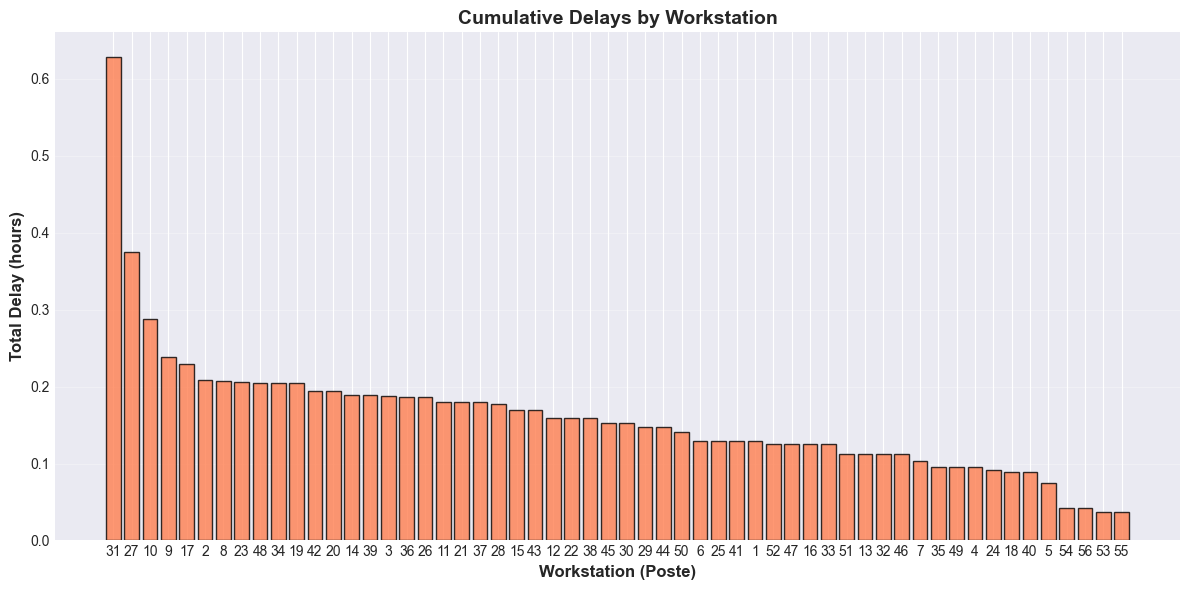

✅ Delay analysis chart generated


In [17]:
plt.figure(figsize=(12, 6))
plt.bar(delays_by_poste['Poste'].astype(str), delays_by_poste['Retard total (h)'], 
        color='coral', edgecolor='black', alpha=0.8)
plt.xlabel('Workstation (Poste)', fontsize=12, fontweight='bold')
plt.ylabel('Total Delay (hours)', fontsize=12, fontweight='bold')
plt.title('Cumulative Delays by Workstation', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Delay analysis chart generated")

### 11.2 Human Cost by Workstation

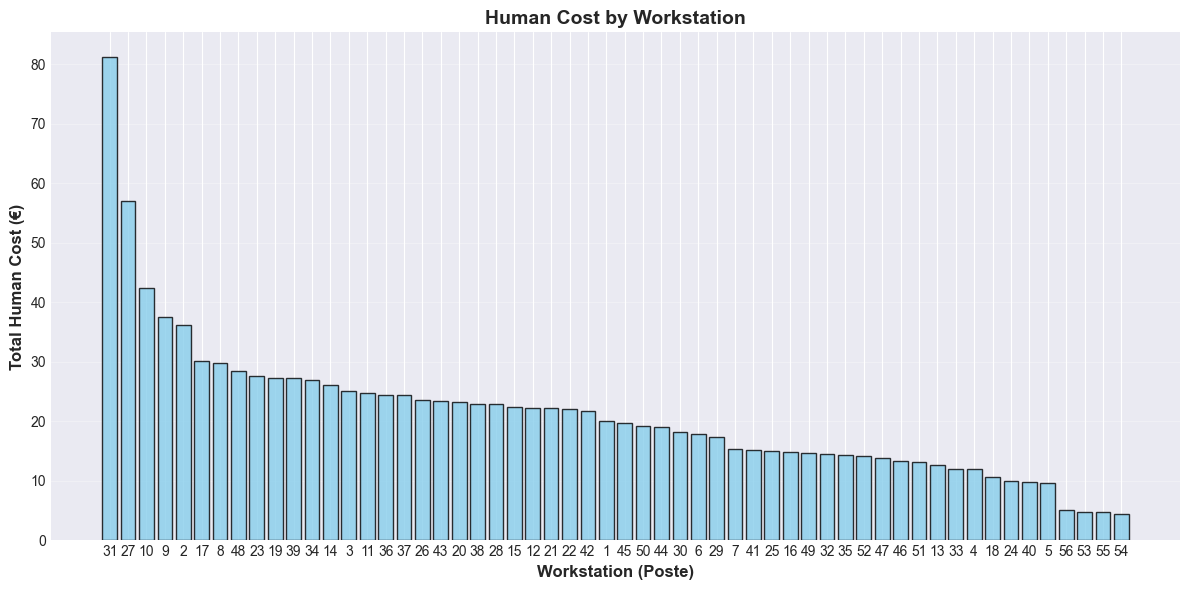

✅ Human cost chart generated


In [18]:
plt.figure(figsize=(12, 6))
plt.bar(human_cost_by_poste['Poste'].astype(str), human_cost_by_poste['Coût humain total (€)'], 
        color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel('Workstation (Poste)', fontsize=12, fontweight='bold')
plt.ylabel('Total Human Cost (€)', fontsize=12, fontweight='bold')
plt.title('Human Cost by Workstation', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Human cost chart generated")

### 11.3 Scatter Plot: Real Time vs Total Cost

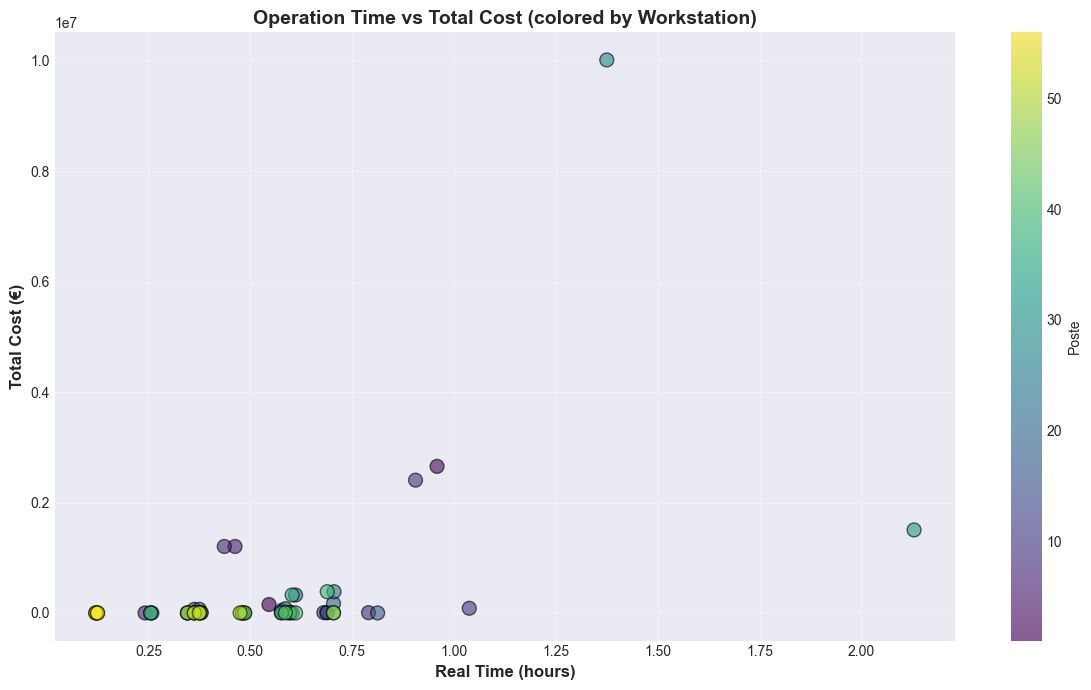

✅ Scatter plot generated


In [19]:
plt.figure(figsize=(12, 7))
scatter = plt.scatter(mes_final['Temps Réel (h)'], mes_final['Coût total (€)'], 
                      c=mes_final['Poste'], cmap='viridis', alpha=0.6, s=100, edgecolors='black')
plt.xlabel('Real Time (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Total Cost (€)', fontsize=12, fontweight='bold')
plt.title('Operation Time vs Total Cost (colored by Workstation)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Poste')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Scatter plot generated")

### 11.4 Cost Breakdown (Human vs Material)

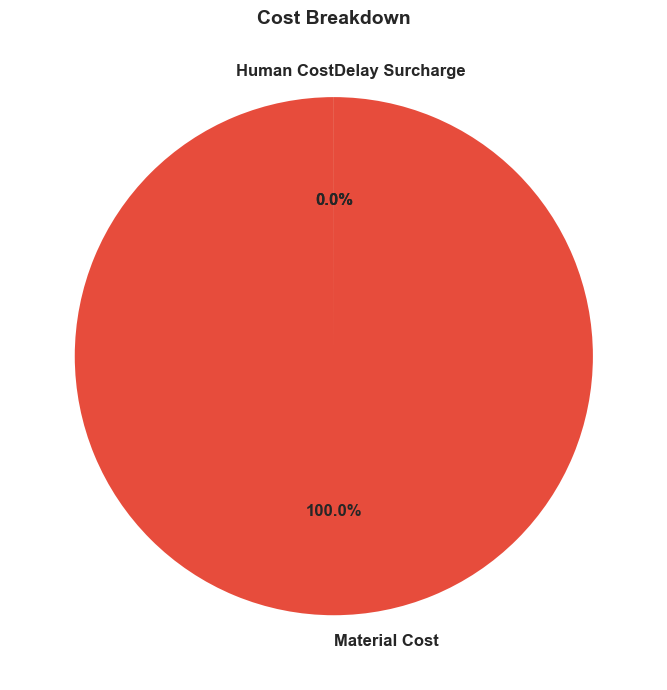

✅ Cost breakdown pie chart generated


In [20]:
cost_breakdown = pd.DataFrame({
    'Category': ['Human Cost', 'Material Cost', 'Delay Surcharge'],
    'Amount': [
        mes_final['Coût humain (€)'].sum(),
        mes_final['Coût matière total (€)'].sum(),
        mes_final['Surcoût retard (€)'].sum()
    ]
})

plt.figure(figsize=(10, 7))
colors = ['#3498db', '#e74c3c', '#f39c12']
plt.pie(cost_breakdown['Amount'], labels=cost_breakdown['Category'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Cost Breakdown', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Cost breakdown pie chart generated")

### 11.5 Correlation Heatmap

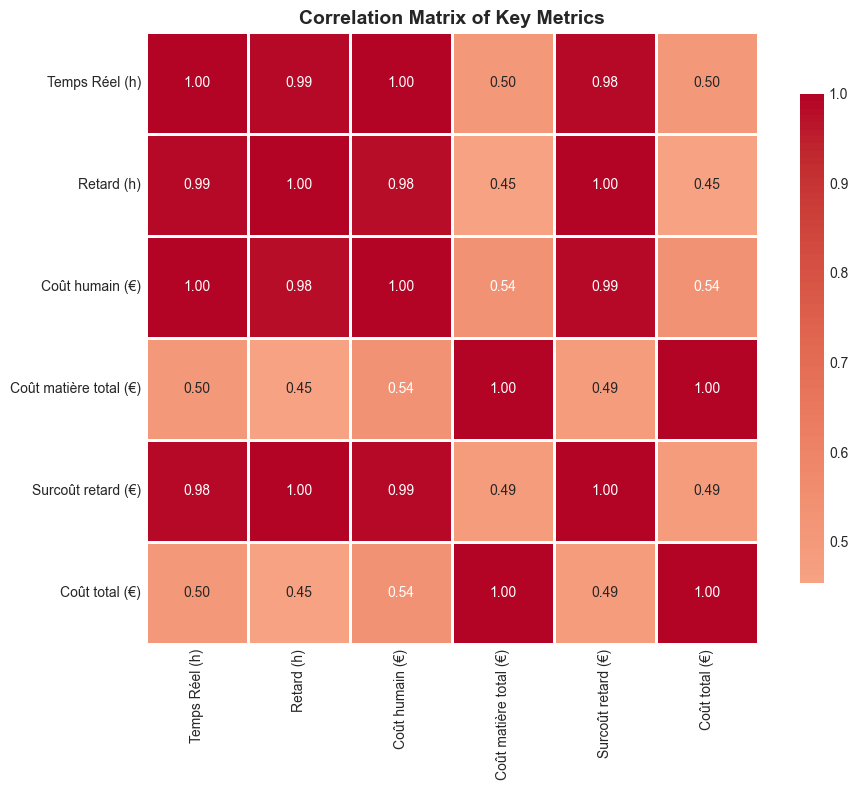

✅ Correlation heatmap generated


In [21]:
# Select numerical columns for correlation analysis
correlation_cols = ['Temps Réel (h)', 'Retard (h)', 'Coût humain (€)', 
                    'Coût matière total (€)', 'Surcoût retard (€)', 'Coût total (€)']

correlation_matrix = mes_final[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix of Key Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap generated")

## 12. Anomaly Detection (AI)

Use Isolation Forest to detect anomalous operations based on time, delay, and cost.

In [22]:
# Prepare features for anomaly detection
features_for_ai = ['Temps Réel (h)', 'Retard (h)', 'Coût total (€)']
X = mes_final[features_for_ai].copy()

# Handle any NaN values
X = X.fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso_forest = IsolationForest(
    contamination=0.1,  # Expect 10% anomalies
    random_state=42,
    n_estimators=100
)

# Predict anomalies (-1 = anomaly, 1 = normal)
mes_final['Anomaly'] = iso_forest.fit_predict(X_scaled)
mes_final['Anomaly_label'] = mes_final['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Compute anomaly score (lower = more anomalous)
mes_final['Anomaly_score'] = iso_forest.decision_function(X_scaled)

print("✅ Anomaly detection completed")
print(f"\n📊 Anomaly Statistics:")
print(f"   Total operations: {len(mes_final)}")
print(f"   Normal operations: {(mes_final['Anomaly'] == 1).sum()}")
print(f"   Anomalous operations: {(mes_final['Anomaly'] == -1).sum()}")
print(f"   Anomaly rate: {100 * (mes_final['Anomaly'] == -1).sum() / len(mes_final):.1f}%")

✅ Anomaly detection completed

📊 Anomaly Statistics:
   Total operations: 56
   Normal operations: 50
   Anomalous operations: 6
   Anomaly rate: 10.7%


### 12.1 Top Anomalies

In [23]:
anomalies = mes_final[mes_final['Anomaly'] == -1].sort_values('Anomaly_score')

print("🚨 TOP 10 ANOMALOUS OPERATIONS")
print("="*80)
display(anomalies[['Operation_ID', 'Poste', 'Nom', 'Temps Réel (h)', 'Retard (h)', 
                    'Coût total (€)', 'Anomaly_score']].head(10))

print(f"\nTotal cost of anomalous operations: {anomalies['Coût total (€)'].sum():,.2f} €")
print(f"Average cost of anomalies: {anomalies['Coût total (€)'].mean():,.2f} € (vs {mes_final[mes_final['Anomaly']==1]['Coût total (€)'].mean():,.2f} € for normal)")

🚨 TOP 10 ANOMALOUS OPERATIONS


,Operation_ID,Poste,Nom,Temps Réel (h),Retard (h),Coût total (€),Anomaly_score
30,30,31,Assemblage train atterissage gauche,2.13,0.63,1502881.26,-0.26
26,26,27,Assemblage réacteurs,1.38,0.38,10014377.06,-0.24
9,9,10,Assemblage queue avion,1.04,0.29,84412.36,-0.08
1,1,2,Assemblage moteur / fuselage / train atterissage,0.96,0.21,2654686.26,-0.07
8,8,9,Assemblage fuselage centrale,0.91,0.24,2404757.58,-0.07
6,6,7,Assemblage fuselage centrale,0.44,0.10,1203915.34,-0.01



Total cost of anomalous operations: 17,865,029.86 €
Average cost of anomalies: 2,977,504.98 € (vs 65,288.60 € for normal)


### 12.2 Visualize Anomalies

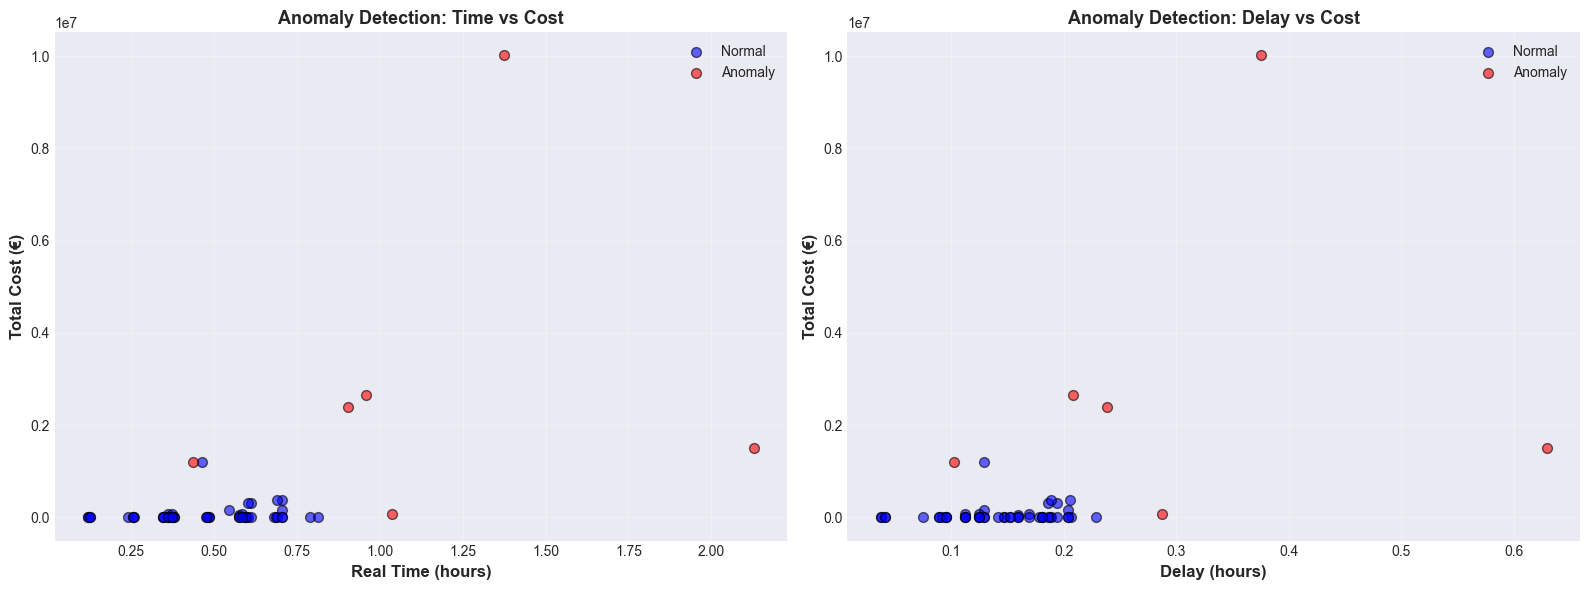

✅ Anomaly visualization generated


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time vs Cost with anomalies
for label, color in [('Normal', 'blue'), ('Anomaly', 'red')]:
    mask = mes_final['Anomaly_label'] == label
    axes[0].scatter(mes_final[mask]['Temps Réel (h)'], 
                   mes_final[mask]['Coût total (€)'],
                   c=color, label=label, alpha=0.6, s=50, edgecolors='black')

axes[0].set_xlabel('Real Time (hours)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Cost (€)', fontsize=12, fontweight='bold')
axes[0].set_title('Anomaly Detection: Time vs Cost', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Delay vs Cost with anomalies
for label, color in [('Normal', 'blue'), ('Anomaly', 'red')]:
    mask = mes_final['Anomaly_label'] == label
    axes[1].scatter(mes_final[mask]['Retard (h)'], 
                   mes_final[mask]['Coût total (€)'],
                   c=color, label=label, alpha=0.6, s=50, edgecolors='black')

axes[1].set_xlabel('Delay (hours)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Cost (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Anomaly Detection: Delay vs Cost', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Anomaly visualization generated")

## 13. Executive Summary

**Summary of key findings and recommendations for AirPlus management.**

In [25]:
# Calculate key metrics for summary
total_operations = len(mes_final)
total_cost = mes_final['Coût total (€)'].sum()
total_human_cost = mes_final['Coût humain (€)'].sum()
total_material_cost = mes_final['Coût matière total (€)'].sum()
total_delay_cost = mes_final['Surcoût retard (€)'].sum()
total_delay_hours = mes_final['Retard (h)'].sum()
operations_with_delay = (mes_final['Retard (h)'] > 0).sum()
avg_delay = mes_final[mes_final['Retard (h)'] > 0]['Retard (h)'].mean()

worst_poste = delays_by_poste.iloc[0]['Poste']
worst_poste_delay = delays_by_poste.iloc[0]['Retard total (h)']

most_expensive_poste = human_cost_by_poste.iloc[0]['Poste']
most_expensive_cost = human_cost_by_poste.iloc[0]['Coût humain total (€)']

anomaly_count = (mes_final['Anomaly'] == -1).sum()
anomaly_cost = mes_final[mes_final['Anomaly'] == -1]['Coût total (€)'].sum()

print("")
print("="*90)
print("                      📊 EXECUTIVE SUMMARY - AIRPLUS PROCESS MINING                      ")
print("="*90)
print("")
print(f"🏭 OPERATIONS OVERVIEW")
print(f"   • Total operations analyzed: {total_operations}")
print(f"   • Total cost: {total_cost:,.2f} €")
print(f"   • Human cost: {total_human_cost:,.2f} € ({100*total_human_cost/total_cost:.1f}%)")
print(f"   • Material cost: {total_material_cost:,.2f} € ({100*total_material_cost/total_cost:.1f}%)")
print("")
print(f"⏱️ DELAY ANALYSIS")
print(f"   • Total delay hours: {total_delay_hours:.2f} hours")
print(f"   • Operations with delays: {operations_with_delay} ({100*operations_with_delay/total_operations:.1f}%)")
print(f"   • Average delay (when present): {avg_delay:.2f} hours")
print(f"   • Total delay surcharge: {total_delay_cost:,.2f} €")
print(f"   • Delay impact on costs: {100*total_delay_cost/total_human_cost:.2f}% of human costs")
print("")
print(f"🎯 KEY BOTTLENECKS")
print(f"   • Worst bottleneck: Poste {worst_poste} ({worst_poste_delay:.2f}h total delay)")
print(f"   • Most expensive workstation: Poste {most_expensive_poste} ({most_expensive_cost:,.2f}€ human cost)")
print(f"   • Top 10 operations represent: {100*top_expensive['Coût total (€)'].sum()/total_cost:.1f}% of total cost")
print("")
print(f"🤖 AI ANOMALY DETECTION")
print(f"   • Anomalous operations detected: {anomaly_count} ({100*anomaly_count/total_operations:.1f}%)")
print(f"   • Cost of anomalies: {anomaly_cost:,.2f} €")
print(f"   • Anomaly avg cost: {anomaly_cost/anomaly_count:,.2f} € (vs {mes_final[mes_final['Anomaly']==1]['Coût total (€)'].mean():,.2f} € normal)")
print("")
print(f"💡 COST REDUCTION OPPORTUNITIES")
print(f"   1. Eliminate delays → Save {total_delay_cost:,.2f} € ({100*total_delay_cost/total_cost:.2f}% of total)")
print(f"   2. Optimize Poste {worst_poste} → Potential {100*worst_poste_delay/total_delay_hours:.1f}% delay reduction")
print(f"   3. Investigate anomalies → Review {anomaly_count} operations costing {anomaly_cost:,.2f} €")
print(f"   4. Focus on top 10 operations → Impact {100*top_expensive['Coût total (€)'].sum()/total_cost:.1f}% of costs")
print("")
print(f"📈 ESTIMATED SAVINGS POTENTIAL")
if total_delay_cost > 0:
    potential_savings = total_delay_cost * 0.5  # Assume 50% delay reduction is achievable
    print(f"   • Conservative (50% delay reduction): {potential_savings:,.2f} €")
    print(f"   • Optimistic (80% delay reduction): {total_delay_cost*0.8:,.2f} €")
    print(f"   • Best case (100% delay elimination): {total_delay_cost:,.2f} €")
else:
    print(f"   • Minimal delays detected - focus on material cost optimization")
print("")
print("="*90)
print("")


                      📊 EXECUTIVE SUMMARY - AIRPLUS PROCESS MINING                      

🏭 OPERATIONS OVERVIEW
   • Total operations analyzed: 56
   • Total cost: 21,129,460.07 €
   • Human cost: 1,190.07 € (0.0%)
   • Material cost: 21,128,270.00 € (100.0%)

⏱️ DELAY ANALYSIS
   • Total delay hours: 8.96 hours
   • Operations with delays: 56 (100.0%)
   • Average delay (when present): 0.16 hours
   • Total delay surcharge: 346.23 €
   • Delay impact on costs: 29.09% of human costs

🎯 KEY BOTTLENECKS
   • Worst bottleneck: Poste 31.0 (0.63h total delay)
   • Most expensive workstation: Poste 31.0 (81.26€ human cost)
   • Top 10 operations represent: 96.6% of total cost

🤖 AI ANOMALY DETECTION
   • Anomalous operations detected: 6 (10.7%)
   • Cost of anomalies: 17,865,029.86 €
   • Anomaly avg cost: 2,977,504.98 € (vs 65,288.60 € normal)

💡 COST REDUCTION OPPORTUNITIES
   1. Eliminate delays → Save 346.23 € (0.00% of total)
   2. Optimize Poste 31.0 → Potential 7.0% delay reduction
 

## 14. Export Results

Save processed data and analysis results for further use.

In [26]:
# Export final dataset
mes_final.to_excel('data/AirPlus_Analysis_Results.xlsx', index=False)
print("✅ Results exported to: data/AirPlus_Analysis_Results.xlsx")

# Export summary tables
with pd.ExcelWriter('data/AirPlus_Summary_Reports.xlsx') as writer:
    top_expensive.to_excel(writer, sheet_name='Top_Expensive_Ops', index=False)
    delays_by_poste.to_excel(writer, sheet_name='Delays_by_Poste', index=False)
    human_cost_by_poste.to_excel(writer, sheet_name='Costs_by_Poste', index=False)
    component_analysis.head(50).to_excel(writer, sheet_name='Top_Components', index=False)
    anomalies[['Operation_ID', 'Poste', 'Nom', 'Temps Réel (h)', 'Retard (h)', 
               'Coût total (€)', 'Anomaly_score']].to_excel(writer, sheet_name='Anomalies', index=False)

print("✅ Summary reports exported to: data/AirPlus_Summary_Reports.xlsx")
print("")
print("🎉 ANALYSIS COMPLETE - All results saved!")

✅ Results exported to: data/AirPlus_Analysis_Results.xlsx
✅ Summary reports exported to: data/AirPlus_Summary_Reports.xlsx

🎉 ANALYSIS COMPLETE - All results saved!


---

## 📝 Conclusion

This notebook has successfully:

✅ Loaded and integrated ERP, MES, and PLM datasets  
✅ Converted time fields and computed delays accurately  
✅ Mapped hourly costs from ERP to operations  
✅ Expanded references and merged with component data  
✅ Calculated comprehensive cost metrics  
✅ Identified bottlenecks and cost drivers  
✅ Visualized key findings  
✅ Applied AI anomaly detection  
✅ Generated executive summary with actionable insights  

**Next Steps:**
1. Review anomalous operations in detail
2. Investigate root causes of delays at critical workstations
3. Implement process improvements based on findings
4. Monitor KPIs post-implementation
5. Iterate analysis with updated data

---

*Generated for AirPlus Process Mining Hackathon - November 2025*